<h1>Proyecto de deteccion de fraude en tarjeta de credito</h1>
<br>
proyecto de estudio usando el data set de fraudes en tarjetas de credito.
<br>
<a href='https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkGuidedProjectsIBMGPXX0RHPEN82-2022-01-01'>link dataset</a>
<br>
<br>
El modelo predictivo lo realice usando Arbol de decision y regresion logistica. En donde la evalucion del modelo de arbol tuvo una precision de <b>0.999%</b> y el de regresion logistica <b>0.999%</b>

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('../../Downloads/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#dimension de nuestro dataset
df.shape

(284807, 31)

In [5]:
#en la vida real las instituciones financieras tienen acceso a muchas
#mas transacciones. Para simular esto inflaremos el data set original

big_df = pd.DataFrame(np.repeat(df.values,10,axis=0),columns=df.columns)
big_df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [6]:
big_df.shape

(2848070, 31)

/Users/patodev/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Tipo distribucion')

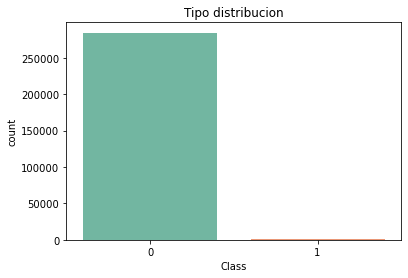

In [80]:
sns.set_palette('Set2')
sns.countplot(df['Class'])
plt.title('Tipo distribucion')

In [13]:
cantidad_si_fruade = df[df['Class'] == 1.0]
cantidad_si_fruade = cantidad_si_fruade.shape[0]

print(f'cantidad de fruades: {cantidad_si_fruade}')

cantidad de fruades: 492


<Figure size 1080x576 with 0 Axes>

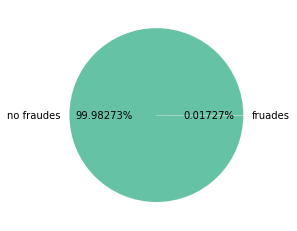

In [67]:
no_fraudes = int(big_df.shape[0]-cantidad_si_fruade)
valores = [no_fraudes,cantidad_si_fruade]


plt.figure(figsize=(15,8))
fig,ax = plt.subplots()
ax.pie(x=valores,labels=['no fraudes','fruades'],autopct='%.5f%%',
      wedgeprops={'linewidth' : 0.1, 'edgecolor':'white'})
plt.show()


In [42]:
#preprocesamiento de datos
#escalado/normalizacion, es util para los modelos lineales, ya que aceleran
#la convergencia del entrenamiento, estandarizando las caracteristicas y 
#eliminando la media y escalando a la varianza de la unidad

big_df.iloc[:,1:30] = StandardScaler().fit_transform(big_df.iloc[:,1:30])
data_matrix = big_df.values

#features 
X = data_matrix[:,1:30]
y = data_matrix[:,30]

#normalizacion
X = normalize(X,norm='l1')

In [43]:
#creacion de las variables de entrenamiento y testeo
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1993649, 29), (1993649,), (854421, 29), (854421,))

In [45]:
model_tree = DecisionTreeClassifier(max_depth=4,random_state=30).fit(X_train,y_train)

In [49]:
#medir score
score = model_tree.score(X_test,y_test)
score

0.9989080324570674

In [50]:
#prediccion 
model_tree_predict = model_tree.predict(X_test)
model_tree_predict

array([0., 0., 0., ..., 0., 0., 0.])

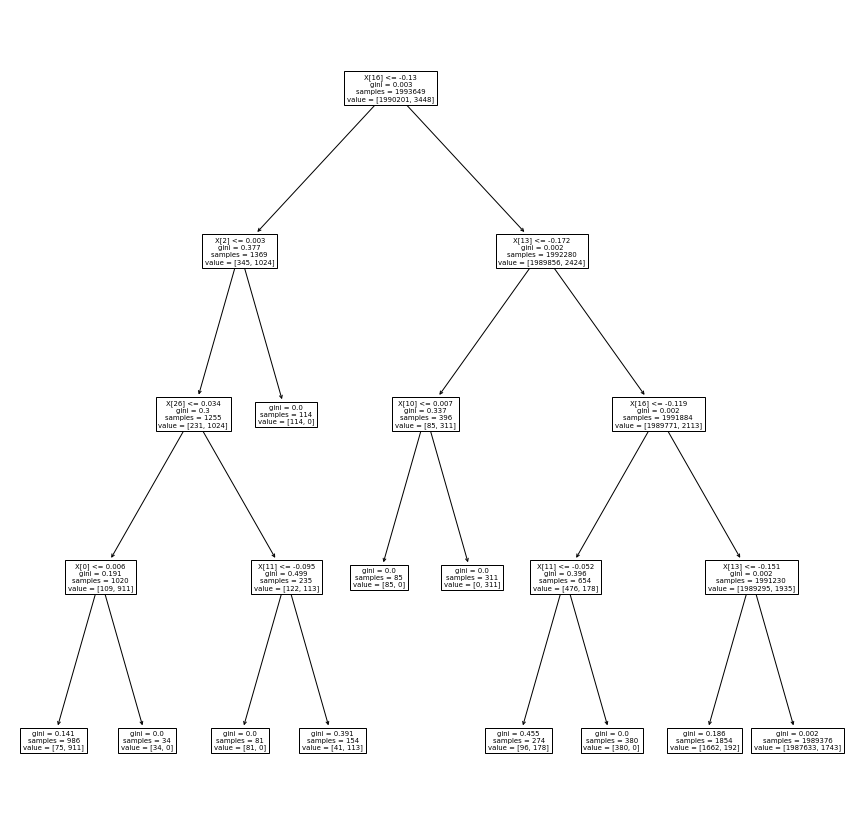

In [55]:
plt.figure(figsize=(15,15))
plot_tree(model_tree)
plt.show()

In [57]:
#evaluacion del modelo 
print(f'evaluacion modelo: {accuracy_score(y_test,model_tree_predict)}')

evaluacion modelo: 0.9989080324570674


<h1>Regresion logistica</h1>

In [71]:
model_reg_log = LogisticRegression().fit(X_train,y_train)
reg_log_predict = model_reg_log.predict(X_test)
reg_log_predict

array([0., 0., 0., ..., 0., 0., 0.])

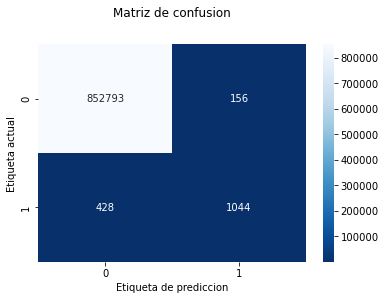

In [76]:
#matrix de confusion 
cnf_matrix = confusion_matrix(y_test,reg_log_predict)

sns.heatmap(cnf_matrix,annot=True,cmap='Blues_r',fmt='g')
plt.title('Matriz de confusion',y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de prediccion')
plt.show()

In [78]:
score_2 = accuracy_score(y_test,reg_log_predict)
score_2

0.9993164962003509